# Ansatz: Regression mittels Multi-Layered Perceptron

In [2]:
CSV_FILE = 'angle_measurements.csv'
RANDOM_STATE = 42

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv(CSV_FILE)

real = np.array(df.real)
north = np.array(df.north)
east = np.array(df.east)
south = np.array(df.south)
west = np.array(df.west)
meas = np.array(df.meas)

## Basis: Sensordaten

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from skl2onnx import to_onnx
import skops.io as sio

feature_matrix = np.array([north, east, south, west]).T

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, real, test_size=0.2)

# model = MLPRegressor(hidden_layer_sizes=(20,20), random_state=RANDOM_STATE, max_iter=100_000)
# model.fit(X_train, y_train)
# sio.dump(model, 'mlp_regressor_model_sensor_data.skops')

# onx = to_onnx(model, feature_matrix)
# with open('mlp_regressor_model_sensor_data.onnx', 'wb') as f:
#     f.write(onx.SerializeToString())

model_file = 'mlp_regressor_model_sensor_data.skops'
untrusted_types = sio.get_untrusted_types(file=model_file)
model = sio.load(model_file, trusted=untrusted_types)

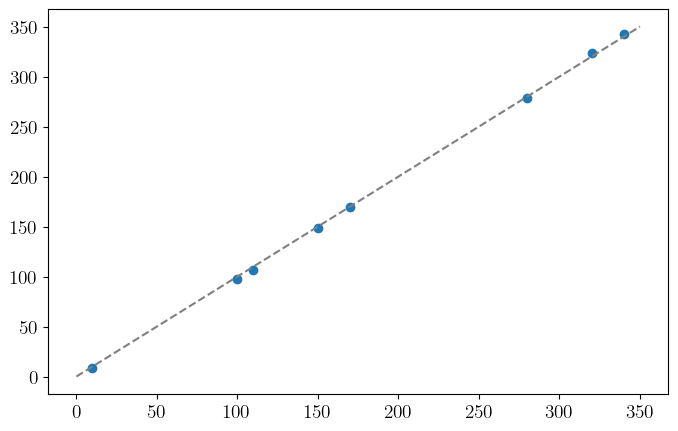

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 14.0
plt.rcParams['text.usetex'] = True
plt.rcParams['legend.loc'] = 'lower right'
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.figsize'] = (8, 5)

y_test_predict = model.predict(X_test)
y_test_predict = np.round(y_test_predict)

plt.scatter(y_test, y_test_predict)
plt.plot(real, real, color='grey', linestyle='--')
plt.show()

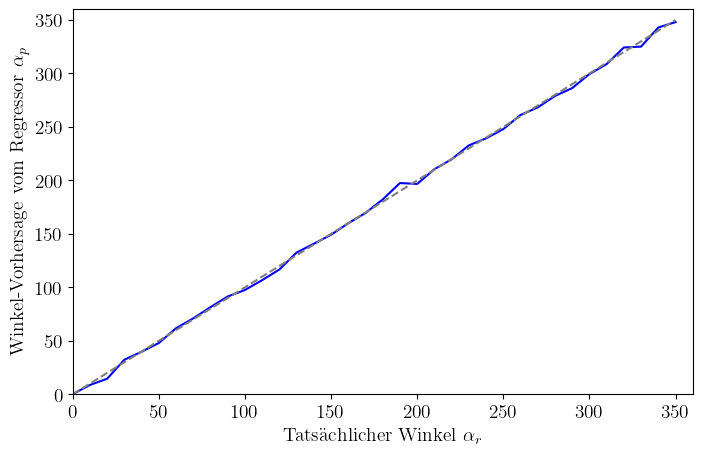

In [11]:
pred_all = model.predict(feature_matrix)

plt.plot(real, pred_all, 'blue')
plt.plot(real, real, color='grey', linestyle='--')

plt.xlabel(r'Tatsächlicher Winkel $\alpha_{r}$')
plt.ylabel(r'Winkel-Vorhersage vom Regressor $\alpha_{p}$')

plt.xlim(0, 360)
plt.ylim(0, 360)

plt.show()

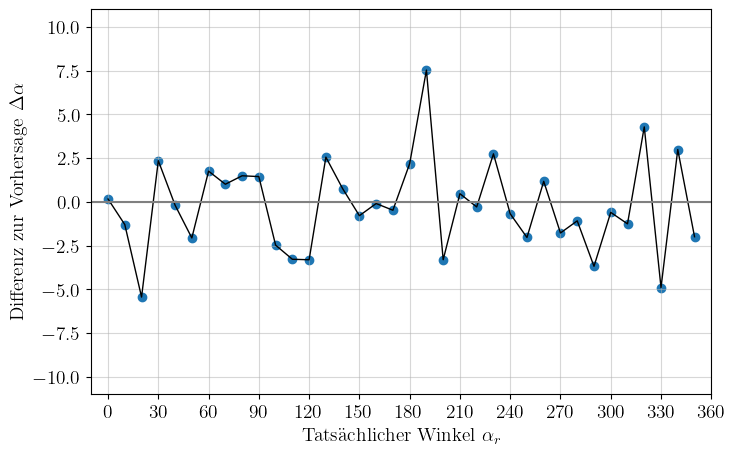

In [13]:
plt.plot(real, pred_all - real, color='black', linewidth=1)
plt.scatter(real, pred_all - real)

plt.grid(which='both', alpha=0.5)

plt.xticks(np.linspace(0, 360, 13))
plt.axhline(0, color='grey')

plt.xlabel(r'Tatsächlicher Winkel $\alpha_{r}$')
plt.ylabel(r'Differenz zur Vorhersage $\Delta\alpha$')

plt.xlim(-10, 360)
plt.ylim(-11, 11)

plt.show()

## Basis-Daten: Gemessene Winkel

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(meas, real, test_size=0.2, random_state=RANDOM_STATE)

X_train = np.reshape(X_train, (X_train.size, 1))
X_test = np.reshape(X_test, (X_test.size, 1))

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

np.set_printoptions(suppress=True)

model = MLPRegressor(hidden_layer_sizes=(80,), random_state=RANDOM_STATE, max_iter=100_000)
model.fit(X_train, y_train)

y_test_predict = model.predict(X_test)
y_test_predict = np.round(y_test_predict)

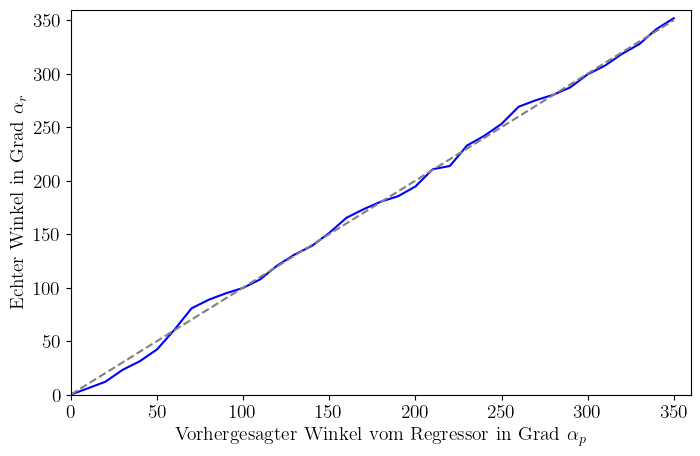

In [13]:
import matplotlib.pyplot as plt

pred_all = model.predict(meas.reshape((meas.size, 1)))

plt.plot(real, pred_all, color='blue')
plt.plot(real, real, color='grey', linestyle='--')

plt.xlabel(r'Vorhergesagter Winkel vom Regressor in Grad $\alpha_{p}$')
plt.ylabel(r'Echter Winkel in Grad $\alpha_{r}$')

plt.xlim(0, 360)
plt.ylim(0, 360)

plt.show()

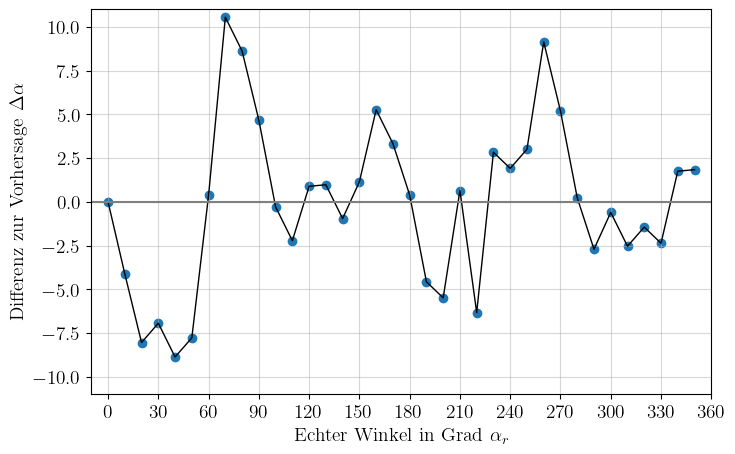

In [14]:
plt.plot(real, pred_all - real, color='black', linewidth=1)
plt.scatter(real, pred_all - real)

plt.grid(which='both', alpha=0.5)

plt.xticks(np.linspace(0, 360, 13))
plt.axhline(0, color='grey')

plt.xlabel(r'Echter Winkel in Grad $\alpha_{r}$')
plt.ylabel(r'Differenz zur Vorhersage $\Delta\alpha$')

plt.xlim(-10, 360)
plt.ylim(-11, 11)

plt.show()